In [74]:
import pandas as pd
file_path = '/Users/yujinlee/Google_Drive/NYU/Fall_2023/Capstone/CrimeData'

In [75]:
boston = pd.read_csv(file_path + '/clean/boston_weekly_data_with_covariates.csv', low_memory = False)
seattle = pd.read_csv(file_path + '/clean/seattle_weekly_data_with_covariates.csv', low_memory = False)
nyc = pd.read_csv(file_path + '/clean/nyc_weekly_data.csv', low_memory = False)
la = pd.read_csv(file_path + '/clean/la_weekly_data.csv', low_memory = False)

In [76]:
nyc = nyc.rename(columns={"CASERATE": "case_count"})
la = la.rename(columns={"new_case": "case_count"})
boston = boston.rename(columns={"weekly_cases": "case_count"})

In [77]:
nyc['case_count'] = nyc['case_count'].fillna(0)

In [78]:
la = la.drop('caserate', axis=1)

In [79]:
nyc.dtypes

week                 object
ZCTA5CE10             int64
total_count         float64
total_population    float64
crime_rate          float64
e/pop_rate          float64
un_rate             float64
p_rate              float64
in_median           float64
in_mean             float64
case_count          float64
PCTPOS              float64
week_no               int64
y_hat               float64
dtype: object

In [80]:
nyc.head()

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat
0,2018-01-07,10001,99.0,27004.0,36.661235,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,1,10.416994
1,2018-01-14,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,2,10.418465
2,2018-02-04,10001,97.0,27004.0,35.920604,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,5,10.422879
3,2018-02-11,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,6,10.424351
4,2018-02-18,10001,106.0,27004.0,39.253444,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,7,10.425822


In [81]:
boston.head()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,week_no,case_count
0,2108,2018-01-07,12,4218,28.449502,2018,61.2,8.3,10.8,136667.0,136667.0,1,0.0
1,2108,2018-01-14,16,4218,37.932670,2018,61.2,8.3,10.8,136667.0,136667.0,2,0.0
2,2108,2018-01-21,18,4218,42.674253,2018,61.2,8.3,10.8,136667.0,136667.0,3,0.0
3,2108,2018-01-28,16,4218,37.932670,2018,61.2,8.3,10.8,136667.0,136667.0,4,0.0
4,2108,2018-02-04,15,4218,35.561878,2018,61.2,8.3,10.8,136667.0,136667.0,5,0.0


In [82]:
la.dtypes

week                 object
ZCTA5CE10             int64
total_count         float64
total_population    float64
crime_rate          float64
e/pop_rate          float64
un_rate             float64
p_rate              float64
in_median             int64
in_mean               int64
case_count          float64
week_no               int64
y_hat               float64
dtype: object

In [83]:
nyc[nyc.isna().any(axis=1)]

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat


In [84]:
la[la.isna().any(axis=1)]

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,week_no,y_hat


In [85]:
boston['week'] = pd.to_datetime(boston['week'])
seattle['week'] = pd.to_datetime(seattle['week'])
nyc['week'] = pd.to_datetime(nyc['week'])
la['week'] = pd.to_datetime(la['week'])

# 1st Pre-trend Analysis

In [86]:
boston_1st = boston[(boston['week'] >= '2018-01-01') & (boston['week'] <= '2019-12-31')]
seattle_1st = seattle[(seattle['week'] >= '2018-01-01') & (seattle['week'] <= '2019-12-31')]
nyc_1st = nyc[(nyc['week'] >= '2018-01-01') & (nyc['week'] <= '2019-12-31')]
la_1st = la[(la['week'] >= '2018-01-01') & (la['week'] <= '2019-12-31')]

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
boston_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=boston_1st).fit()
boston_1st['y_hat'] = boston_model.predict(boston_1st)
print(boston_1st['y_hat'].mean())
print(boston_model.summary())

30.10752705945185
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     85.99
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.75e-69
Time:                        01:19:44   Log-Likelihood:                -14759.
No. Observations:                3212   AIC:                         2.953e+04
Df Residuals:                    3207   BIC:                         2.956e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1793      3.065  

/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/1817823523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_1st['y_hat'] = boston_model.predict(boston_1st)
/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [88]:
seattle_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=seattle_1st).fit()
seattle_1st['y_hat'] = seattle_model.predict(seattle_1st)
print(seattle_1st['y_hat'].mean())
print(seattle_model.summary())

17.152019230559453
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          1.50e-204
Time:                        01:19:44   Log-Likelihood:                -11340.
No. Observations:                2808   AIC:                         2.269e+04
Df Residuals:                    2803   BIC:                         2.272e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.2096      2.806 

/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/3071156503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_1st['y_hat'] = seattle_model.predict(seattle_1st)
/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [89]:
nyc_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=nyc_1st).fit()
nyc_1st['y_hat'] = nyc_model.predict(nyc_1st)
print(nyc_1st['y_hat'].mean())
print(nyc_model.summary())

10.477744666903519
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:19:44   Log-Likelihood:                -63151.
No. Observations:               18807   AIC:                         1.263e+05
Df Residuals:                   18802   BIC:                         1.264e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1425      0.321 

/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/4163663363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_1st['y_hat'] = nyc_model.predict(nyc_1st)
/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [90]:
la_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=la_1st).fit()
la_1st['y_hat'] = la_model.predict(la_1st)
print(la_1st['y_hat'].mean())
print(la_model.summary())

9.691801873755585
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     961.4
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:19:44   Log-Likelihood:                -54620.
No. Observations:               13891   AIC:                         1.093e+05
Df Residuals:                   13886   BIC:                         1.093e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3404      0.817  

/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/2167795371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_1st['y_hat'] = la_model.predict(la_1st)
/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [91]:
nyc_1st['city'] = 'nyc'
la_1st['city'] = 'la'
boston_1st['city'] = 'boston'
seattle_1st['city'] = 'seattle'

/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/765401552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_1st['city'] = 'nyc'
/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/765401552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_1st['city'] = 'la'
/var/folders/yw/mp5v5fdx1_n4b01714b8bdl80000gn/T/ipykernel_64547/765401552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [92]:
nycla_1st = pd.concat([nyc_1st, la_1st], axis=0)
nycboston_1st = pd.concat([nyc_1st, boston_1st], axis=0)
nycseattle_1st = pd.concat([nyc_1st, seattle_1st], axis=0)

In [93]:
nycla_1st

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat,city
0,2018-01-07,10001,99.0,27004.0,36.661235,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,1,10.254805,nyc
1,2018-01-14,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,2,10.256532,nyc
2,2018-02-04,10001,97.0,27004.0,35.920604,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,5,10.261714,nyc
3,2018-02-11,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,6,10.263441,nyc
4,2018-02-18,10001,106.0,27004.0,39.253444,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,7,10.265168,nyc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37508,2019-12-08,91801,0.0,53320.0,0.000000,59.1,5.2,14.3,55832.0,77641.0,0.0,NaN,101,4.939095,la
37509,2019-12-15,91801,0.0,53320.0,0.000000,59.1,5.2,14.3,55832.0,77641.0,0.0,NaN,102,4.927559,la
37510,2019-12-22,91801,0.0,53320.0,0.000000,59.1,5.2,14.3,55832.0,77641.0,0.0,NaN,103,4.916023,la
37511,2019-12-29,91801,0.0,53320.0,0.000000,59.1,5.2,14.3,55832.0,77641.0,0.0,NaN,104,4.904488,la


In [94]:
nycla_model = smf.ols('crime_rate ~ C(city) + week_no:C(city) + week_no+ p_rate + un_rate + in_median + case_count', data=nycla_1st).fit()
nycla_1st['y_hat_nycla'] = nycla_model.predict(nycla_1st)
print(nycla_1st['y_hat_nycla'].mean())
print(nycla_model.summary())

10.14385478557567
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1214.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:19:44   Log-Likelihood:            -1.2112e+05
No. Observations:               32698   AIC:                         2.423e+05
Df Residuals:                   32691   BIC:                         2.423e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept 

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [95]:
nycboston_1st.head()

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat,city,year,e/pop
0,2018-01-07,10001,99.0,27004.0,36.661235,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,1,10.254805,nyc,NaN,NaN
1,2018-01-14,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,2,10.256532,nyc,NaN,NaN
2,2018-02-04,10001,97.0,27004.0,35.920604,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,5,10.261714,nyc,NaN,NaN
3,2018-02-11,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,6,10.263441,nyc,NaN,NaN
4,2018-02-18,10001,106.0,27004.0,39.253444,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,7,10.265168,nyc,NaN,NaN


In [96]:
nycboston_model = smf.ols('crime_rate ~ C(city) + week_no:C(city) + week_no + p_rate + un_rate + in_median + case_count', data=nycboston_1st).fit()
nycboston_1st['y_hat_nycboston'] = nycboston_model.predict(nycboston_1st)
print(nycboston_1st['y_hat_nycboston'].mean())
print(nycboston_model.summary())

13.341219894454005
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     1786.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:19:44   Log-Likelihood:                -84823.
No. Observations:               22019   AIC:                         1.697e+05
Df Residuals:                   22012   BIC:                         1.697e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [97]:
nycseattle_model = smf.ols('crime_rate ~ C(city) + week_no:C(city) + week_no + p_rate + un_rate + in_median + case_count', data=nycseattle_1st).fit()
nycseattle_1st['y_hat_nycseattle'] = nycseattle_model.predict(nycseattle_1st)
print(nycseattle_1st['y_hat_nycseattle'].mean())
print(nycseattle_model.summary())

11.34479823980253
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     924.7
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:19:44   Log-Likelihood:                -77167.
No. Observations:               21615   AIC:                         1.543e+05
Df Residuals:                   21608   BIC:                         1.544e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
In

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [71]:
nycla_1st[nycla_1st['ZCTA5CE10'] == 91803]

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat,city,y_hat_nycla
37583,2018-07-15,91803,1.0,29006.0,0.344756,56.7,4.5,13.5,60394.0,80843.0,0.0,NaN,28,5.029526,la,6.837992


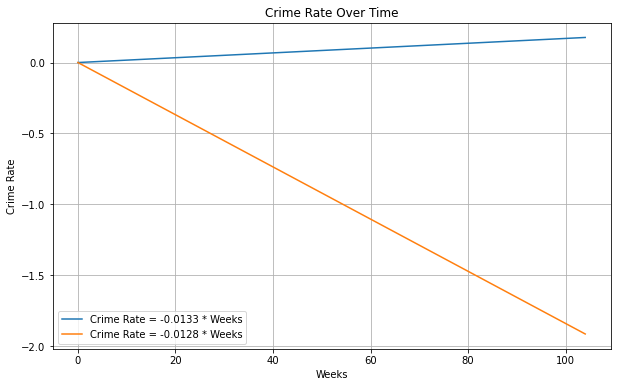

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of weeks
x = np.arange(0, 105)  # From 0 to 130 weeks

# Calculate the crime rate based on the first given equation
y1 = 0.0017 * x

# Calculate the crime rate based on the second given equation
y2 = -0.0184 * x

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first equation
plt.plot(x, y1, label='Crime Rate = -0.0133 * Weeks')

# Plot the second equation
plt.plot(x, y2, label='Crime Rate = -0.0128 * Weeks')  # Dashed line for distinction

# Labeling the axes
plt.xlabel('Weeks')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Over Time')

# Adding a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [100]:
seattle_1st.tail()

,ZCTA5CE10,week,total_count,total_population,crime_rate,year,e/pop,un_rate,p_rate,in_median,in_mean,case_count,week_no,y_hat,city
7456,98199,2019-12-01,19,22359,8.497697,2019,69.0,3.4,5.5,108328.0,108328.0,0.0,100,8.214128,seattle
7457,98199,2019-12-08,19,22359,8.497697,2019,69.0,3.4,5.5,108328.0,108328.0,0.0,101,8.195744,seattle
7458,98199,2019-12-15,8,22359,3.577978,2019,69.0,3.4,5.5,108328.0,108328.0,0.0,102,8.177360,seattle
7459,98199,2019-12-22,21,22359,9.392191,2019,69.0,3.4,5.5,108328.0,108328.0,0.0,103,8.158976,seattle
7460,98199,2019-12-29,10,22359,4.472472,2019,69.0,3.4,5.5,108328.0,108328.0,0.0,104,8.140592,seattle


### NYC - Seattle Data Preparation

In [44]:
nyc_1st_prepost = nyc[(nyc['week'] >= '2018-01-01') & (nyc['week'] <= '2020-06-31')]
seattle_1st_prepost = seattle[(seattle['week'] >= '2018-01-01') & (seattle['week'] <= '2020-06-31')]
nycseattle_1st_prepost = pd.concat([nyc_1st_prepost, seattle_1st_prepost], axis=0)

,week,ZCTA5CE10,total_count,total_population,crime_rate,e/pop_rate,un_rate,p_rate,in_median,in_mean,case_count,PCTPOS,week_no,y_hat,city,y_hat_nycla,treated
0,2018-01-07,10001,99.0,27004.0,36.661235,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,1,10.737083,nyc,10.149901,1.0
1,2018-01-14,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,2,10.724234,nyc,10.137120,1.0
2,2018-02-04,10001,97.0,27004.0,35.920604,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,5,10.685688,nyc,10.098776,1.0
3,2018-02-11,10001,104.0,27004.0,38.512813,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,6,10.672839,nyc,10.085995,1.0
4,2018-02-18,10001,106.0,27004.0,39.253444,67.8,4.5,13.3,88526.0,151628.0,0.0,0.0,7,10.659990,nyc,10.073214,1.0


In [46]:
nycla_1st_stata.to_csv(file_path + '/clean/nyc_la_stata.csv')

# 2nd Pre-trend Analysis

In [ ]:
boston_2nd = boston[(boston['week'] >= '2020-07-01') & (boston['week'] <= '2022-04-01')]
seattle_2nd = seattle[(seattle['week'] >= '2020-07-01') & (seattle['week'] <= '2022-04-01')]
nyc_2nd = nyc[(nyc['week'] >= '2020-07-01') & (nyc['week'] <= '2022-04-01')]
la_2nd = la[(la['week'] >= '2020-07-01') & (la['week'] <= '2022-04-01')]

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
boston_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + weekly_cases', data=boston_2nd).fit()
boston_2nd['y_hat'] = boston_model.predict(boston_2nd)
print(boston_2nd['y_hat'].mean())
print(boston_model.summary())

In [ ]:
seattle_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=seattle_2nd).fit()
seattle_2nd['y_hat'] = seattle_model.predict(seattle_2nd)
print(seattle_2nd['y_hat'].mean())
print(seattle_model.summary())

In [ ]:
nyc_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=nyc_2nd).fit()
nyc_2nd['y_hat'] = nyc_model.predict(nyc_2nd)
print(nyc_2nd['y_hat'].mean())
print(nyc_model.summary())

In [ ]:
la_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_count', data=la_2nd).fit()
la_2nd['y_hat'] = la_model.predict(la_2nd)
print(la_2nd['y_hat'].mean())
print(la_model.summary())